<a href="https://colab.research.google.com/github/BLayus/Case_Saas_Clinicas_Odonto/blob/main/Case_2_PED_Clinicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [94]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt



##Import Datasets

In [95]:
# Import from github

activity = pd.read_csv('https://raw.githubusercontent.com/BLayus/Case_Saas_Clinicas_Odonto/main/bases/activity.csv')

clinics =  pd.read_csv('https://raw.githubusercontent.com/BLayus/Case_Saas_Clinicas_Odonto/main/bases/clinics.csv')

subscriptions = pd.read_csv('https://raw.githubusercontent.com/BLayus/Case_Saas_Clinicas_Odonto/main/bases/subscriptions.csv')

In [96]:
activity.head()

,CLINIC_ID,ACTIVITY_AT,ACTIVITY_TYPE,FEATURE,MODULE,ANALYTICS_DOMAIN,IS_TRANSACTION,IS_BNPL_ACTIVITY,IS_VALID_ACTIVITY,IS_DELETION_ACTIVITY,IS_MANAGEMENT_ACTIVITY,IS_FINANCE_ACTIVITY
0,9825,2023-08-24 18:46:47.733,patient_discarded,patient_management,patient,patient,False,False,True,True,True,False
1,9984,2023-08-24 19:41:43.497,patient_created,patient_management,patient,patient,False,False,False,False,True,False
2,9984,2023-08-24 19:41:44.037,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False
3,9984,2023-08-24 19:51:20.451,patient_created,patient_management,patient,patient,False,False,False,False,True,False
4,9984,2023-08-24 19:51:46.663,time_slot_created,scheduling,schedule,scheduling,False,False,True,False,True,False


In [97]:
clinics.head()

,CLINIC_ID,CLINIC_CREATED_AT,BUSINESS_SEGMENTATION,IS_CHAIN_CLINIC,FIRST_USER_HUBSPOT_SOURCE,INTEREST_REASONS,INTEREST_CATEGORY_SIGNUP,HAS_INTEREST_BNPL,HAS_INTEREST_BNPL_ONLY,HAS_INTEREST_SAAS,...,IS_PAID_MEDIUM,HAS_ASKED_FOR_ACCREDITATION,HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED,IS_ACCREDITATION_APPROVED,IS_ACCREDITATION_REPROVED,CLINIC_ACCREDITATION_STATUS,REQUEST_FINISHED_AT,ACCREDITATION_REQUESTED_AT,ACCREDITATION_APPROVED_AT,ACCREDITATION_REJECTED_AT
0,8993,2023-08-01 06:25:16.121,Independente,False,Inbound,"[""bnpl"", ""finance_management"", ""patients_manag...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
1,8994,2023-08-01 06:58:36.251,Independente,False,Inbound,"[""finance_management"", ""patients_management"", ...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
2,8995,2023-08-01 06:59:23.156,Independente,False,Inbound,"[""bnpl""]",Apenas BNPL,True,True,False,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
3,8996,2023-08-01 08:03:38.557,Independente,False,Inbound,"[""calendar"", ""bnpl"", ""patients_management"", ""f...",BNPL e SaaS,True,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN
4,8997,2023-08-01 08:34:33.894,Independente,False,Inbound,"[""patients_management""]",Apenas SaaS,False,False,True,...,True,False,False,False,False,NaN,NaN,NaN,NaN,NaN


In [98]:
subscriptions.head()

,CLINIC_ID,STRIPE_SUBSCRIPTION_ID,SUBSCRIPTION_START_DATE,SUBSCRIPTION_END_DATE,SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT,SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT,MOST_RECENT_INVOICE_CREATED_AT,LAST_PAYMENT_AT,CHECKOUT_STATUS,SUBSCRIPTION_STATUS,BILLING_INTERVAL_IN_MONTHS,FIRST_PAYMENT_METHOD_TYPE,FIRST_CARD_BRAND,FIRST_PAYMENT_AMOUNT,FIRST_PAYMENT_AMOUNT_OFF,FIRST_PAYMENT_PROMOTION_CODE,FIRST_PAYMENT_COUPON_ID,FIRST_PAYMENT_AMOUNT_OFF_2
0,9000,sub_1NaOxzCpjOdJI4gTfqZ2epGB,2023-08-01,2023-10-01,2023-09-01 17:14:51.000,2023-10-01 17:14:51.000,2023-09-01 17:16:49.000,2023-09-01 18:17:14.000,complete,canceled,1.0,Cartão de Crédito,mastercard,89.9,NaN,NaN,NaN,NaN
1,9032,sub_1Namy7CpjOdJI4gTzrxPLlFg,2023-08-02,NaN,2023-10-02 18:52:35.000,2023-11-02 18:52:35.000,2023-10-02 18:53:31.000,2023-08-09 10:20:45.000,complete,past_due,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
2,9105,sub_1NalRdCpjOdJI4gTFRPqMhcv,2023-08-02,NaN,2023-10-02 17:14:57.000,2023-11-02 17:14:57.000,2023-10-02 17:16:56.000,2023-10-02 18:22:04.000,complete,active,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
3,9027,sub_1Nb3CECpjOdJI4gTFLOepcZD,2023-08-03,2023-09-03,2023-08-03 12:12:14.000,2023-09-03 12:12:14.000,2023-08-03 12:12:14.000,2023-08-03 12:12:16.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN
4,9072,sub_1Nb7E2CpjOdJI4gTsIJIy9b1,2023-08-03,2023-09-03,2023-08-03 16:30:22.000,2023-09-03 16:30:22.000,2023-08-03 16:30:22.000,2023-08-03 16:30:24.000,complete,canceled,1.0,Cartão de Crédito,visa,89.9,NaN,NaN,NaN,NaN


In [99]:
display(f'Tabela Subscriptions possui: {subscriptions.shape[0]} linhas em {subscriptions.shape[1]} colunas')
display(f'Tabela Clinics possui: {clinics.shape[0]} linhas em {clinics.shape[1]} colunas')
display(f'Tabela Activity possui: {activity.shape[0]} linhas em {activity.shape[1]} colunas')

'Tabela Subscriptions possui: 385 linhas em 18 colunas'

'Tabela Clinics possui: 2219 linhas em 33 colunas'

'Tabela Activity possui: 13941 linhas em 12 colunas'

In [100]:
# Função para plotar infos e nulos de cada dataset

def dataset_info(df):
  display(df.info())
  display(df.isnull().sum() / df.shape[0] * 100)


In [101]:
dataset_info(subscriptions)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385 entries, 0 to 384
Data columns (total 18 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   CLINIC_ID                               385 non-null    int64  
 1   STRIPE_SUBSCRIPTION_ID                  385 non-null    object 
 2   SUBSCRIPTION_START_DATE                 384 non-null    object 
 3   SUBSCRIPTION_END_DATE                   46 non-null     object 
 4   SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT  385 non-null    object 
 5   SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT     385 non-null    object 
 6   MOST_RECENT_INVOICE_CREATED_AT          385 non-null    object 
 7   LAST_PAYMENT_AT                         371 non-null    object 
 8   CHECKOUT_STATUS                         383 non-null    object 
 9   SUBSCRIPTION_STATUS                     383 non-null    object 
 10  BILLING_INTERVAL_IN_MONTHS              384 non-null    float6

None

CLINIC_ID                                   0.000000
STRIPE_SUBSCRIPTION_ID                      0.000000
SUBSCRIPTION_START_DATE                     0.259740
SUBSCRIPTION_END_DATE                      88.051948
SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT      0.000000
SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT         0.000000
MOST_RECENT_INVOICE_CREATED_AT              0.000000
LAST_PAYMENT_AT                             3.636364
CHECKOUT_STATUS                             0.519481
SUBSCRIPTION_STATUS                         0.519481
BILLING_INTERVAL_IN_MONTHS                  0.259740
FIRST_PAYMENT_METHOD_TYPE                   0.259740
FIRST_CARD_BRAND                           18.701299
FIRST_PAYMENT_AMOUNT                        0.259740
FIRST_PAYMENT_AMOUNT_OFF                  100.000000
FIRST_PAYMENT_PROMOTION_CODE               82.337662
FIRST_PAYMENT_COUPON_ID                    81.038961
FIRST_PAYMENT_AMOUNT_OFF_2                100.000000
dtype: float64

In [102]:
dataset_info(clinics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2219 entries, 0 to 2218
Data columns (total 33 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   CLINIC_ID                                   2219 non-null   int64 
 1   CLINIC_CREATED_AT                           2219 non-null   object
 2   BUSINESS_SEGMENTATION                       2219 non-null   object
 3   IS_CHAIN_CLINIC                             2219 non-null   bool  
 4   FIRST_USER_HUBSPOT_SOURCE                   2219 non-null   object
 5   INTEREST_REASONS                            2066 non-null   object
 6   INTEREST_CATEGORY_SIGNUP                    2219 non-null   object
 7   HAS_INTEREST_BNPL                           2219 non-null   bool  
 8   HAS_INTEREST_BNPL_ONLY                      2219 non-null   bool  
 9   HAS_INTEREST_SAAS                           2219 non-null   bool  
 10  TRIAL_DURATION          

None

CLINIC_ID                                      0.000000
CLINIC_CREATED_AT                              0.000000
BUSINESS_SEGMENTATION                          0.000000
IS_CHAIN_CLINIC                                0.000000
FIRST_USER_HUBSPOT_SOURCE                      0.000000
INTEREST_REASONS                               6.894998
INTEREST_CATEGORY_SIGNUP                       0.000000
HAS_INTEREST_BNPL                              0.000000
HAS_INTEREST_BNPL_ONLY                         0.000000
HAS_INTEREST_SAAS                              0.000000
TRIAL_DURATION                                 0.000000
TRIAL_START_DATE                               0.000000
TRIAL_END_DATE                                 0.000000
TRIAL_START_HOUR                               0.000000
TRIAL_START_HOUR_CATEGORY                      0.000000
TRIAL_START_DAY_OF_WEEK                        0.000000
TRIAL_START_DAY_OF_WEEK_CATEGORY               0.000000
HAS_USER_CREATED                               0

In [103]:
dataset_info(activity)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13941 entries, 0 to 13940
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CLINIC_ID               13941 non-null  int64 
 1   ACTIVITY_AT             13941 non-null  object
 2   ACTIVITY_TYPE           13941 non-null  object
 3   FEATURE                 13941 non-null  object
 4   MODULE                  13941 non-null  object
 5   ANALYTICS_DOMAIN        13941 non-null  object
 6   IS_TRANSACTION          13941 non-null  bool  
 7   IS_BNPL_ACTIVITY        13941 non-null  bool  
 8   IS_VALID_ACTIVITY       13941 non-null  bool  
 9   IS_DELETION_ACTIVITY    13941 non-null  bool  
 10  IS_MANAGEMENT_ACTIVITY  13941 non-null  bool  
 11  IS_FINANCE_ACTIVITY     13941 non-null  bool  
dtypes: bool(6), int64(1), object(5)
memory usage: 735.3+ KB


None

CLINIC_ID                 0.0
ACTIVITY_AT               0.0
ACTIVITY_TYPE             0.0
FEATURE                   0.0
MODULE                    0.0
ANALYTICS_DOMAIN          0.0
IS_TRANSACTION            0.0
IS_BNPL_ACTIVITY          0.0
IS_VALID_ACTIVITY         0.0
IS_DELETION_ACTIVITY      0.0
IS_MANAGEMENT_ACTIVITY    0.0
IS_FINANCE_ACTIVITY       0.0
dtype: float64

## Business Characteristics

###Variáveis da base de dados Subscriptions

**'CLINIC_ID'**    Identificador ID de cadastro da clínica

**'STRIPE_SUBSCRIPTION_ID'**    Identificador único da subscrição

'**SUBSCRIPTION_START_DATE'**    Data de início da subscrição

**'SUBSCRIPTION_END_DATE'**    Data de término da subscrição

**'SUBSCRIPTION_CURRENT_PERIOD_STARTED_AT'**    Data de início do período de pagamento da assinatura

**'SUBSCRIPTION_CURRENT_PERIOD_ENDS_AT'**    Data de término do período de pagamento da assinatura

**'MOST_RECENT_INVOICE_CREATED_AT'**    Data da fatura (invoice) mais recente

**'LAST_PAYMENT_AT'**    Data do último pagamento

**'CHECKOUT_STATUS'**    Status do processo de pagamento / checkout

**'SUBSCRIPTION_STATUS'**    Status atual da assinatura

**'BILLING_INTERVAL_IN_MONTHS'**    Intervalo de cobrança, frequência de pagamento

**'FIRST_PAYMENT_METHOD_TYPE'**    Método de pagamento utilizado no primeiro pagamento

**'FIRST_CARD_BRAND'**    Bandeira do cartão de crédito utilizado no pagamento

**'FIRST_PAYMENT_AMOUNT'**    Valor do primeiro pagamento

**'FIRST_PAYMENT_AMOUNT_OFF'**    Desconto aplicado ao primeiro pagamento

**'FIRST_PAYMENT_PROMOTION_CODE'**    Código promocional do primeiro pagamento

**'FIRST_PAYMENT_COUPON_ID'**    Id do cupom de desconto aplicado

**'FIRST_PAYMENT_AMOUNT_OFF_2'**    Outro campo para possível desconto


Cada linha representa um período de assinatura de uma clínica. Caso a clínica cancele e depois volte a assinar o serviço, esta clínica terá múltiplas linhas na tabela, cada uma representando um período diferente da assinatura

###Variáveis da Base de Dados Clinics

**'CLINIC_ID'**   Identificar ID de cadastro da clínica

**'CLINIC_CREATED_AT'**   Data e hora em que a clínica foi cadastrada

**'BUSINESS_SEGMENTATION'**   Segmento de negócio ao qual a clínica pertence

**'IS_CHAIN_CLINIC'**   Indica se a clínica pertence a uma rede ou franquia

**'FIRST_USER_HUBSPOT_SOURCE'**   Fonte inicial da origem do usuário (por exemplo, adquirido através de campanha publicitária, por consultor, etc)

**'INTEREST_REASONS'**  Razões de interesse da clínica na plataforma

**'INTEREST_CATEGORY_SIGNUP'**   Categorias de interesse assinaladas pela clínica no momento do cadastro

**'HAS_INTEREST_BNPL'**   Se a clínica possui interesse no financiamento BNPL (Buy Now Pay Later)

**'HAS_INTEREST_BNPL_ONLY'**   Indica se a clínica demonstrou interesse apenas no BNPL

**'HAS_INTEREST_SAAS'**   Se a clínica possui interesse em SAAS

**'TRIAL_DURATION'**   Duração do período de teste gratuito

**'TRIAL_START_DATE'**   Data de início do período de teste gratuito

**'TRIAL_END_DATE'**   Data de término do período de teste gratuito

**'TRIAL_START_HOUR'**   Horário de início do teste gratuito

**'TRIAL_START_HOUR_CATEGORY'**   Categoria do horário de início do período de teste (manhã, tarde, noite, etc)

**'TRIAL_START_DAY_OF_WEEK'**   Dia da semana do início do período de teste

**'TRIAL_START_DAY_OF_WEEK_CATEGORY'**   Categoria do dia da semana do início do período de teste (dia útil, final de semana, feriado, etc)

**'HAS_USER_CREATED'**   Indica se um usuário da clínica foi criado no sistema

**'MARKETING_ATTRIBUITION'**   Canal de marketing relacionada à aquisição

**'MARKETING_ATTRIBUITION_CHANNEL_GROUP'**   Grupo do canal de marketing atribuído à aquisição

**'MARKETING_ATTRIBUITION_CAMPAIGN'**  Campanha de marketing específica da aquisição

**'MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT'**   Produto da campanha de marketing que levou à aquisição

**'MARKETING_ATTRIBUITION_AD_GROUP'**   Grupo do anúncio que levou à aquisição

**'IS_PAID_MEDIUM'**   Indica se a aquisição se deu através de um meio pago

**'HAS_ASKED_FOR_ACCREDITATION'**   Indica se a clínica solicitou cadastramento

**'HAS_STARTED_ACCREDITATION_AND_NOT_FINISHED'**  Indica se a clínica iniciou o cadastramento porém não finalizou

**'IS_ACCREDITATION_APPROVED'**  Indica se o cadastramento foi aprovado

**'IS_ACCREDITATION_REPROVED'**   Indica se o cadastramento foi recusado

**'CLINIC_ACCREDITATION_STATUS'**  Status do processo de cadastramento

**'REQUEST_FINISHED_AT'**   Data de finalização da requisição

**'ACCREDITATION_REQUESTED_AT'**  Data do pedido de cadastramento

**'ACCREDITATION_APPROVED_AT'**   Data de aprovação do cadastro

**'ACCREDITATION_REJECTED_AT'**   Data de rejeição do cadastro


As clínicas que pertencem a franquias ou redes e utilizam apenas o sistema de financiamento BNPL, devem ser excluídas das análises sobre conversão de assinaturas, já que pertencem a convênios estabelecidos de outra forma entre as empresas.

###Variáveis da Base de Dados Activity

**'CLINIC_ID'**   Identificador ID de cadastro da clínica

**'ACTIVITY_AT'**  Data e hora de realização da ação

**'ACTIVITY_TYPE'**   Tipo da ação realizada

**'FEATURE'**   Característica do produto / ação realizada

**'MODULE'**   Módulo do sistema em que a ação ocorreu

**'ANALYTICS_DOMAIN'**   Domínio analítico, segmentação para posterior análise

**'IS_TRANSACTION'**'   Indica se houve uma transação envolvendo pagamento

**'IS_BNPL_ACTIVITY'**   Indica se houve um financioamento BNPL

**'IS_VALID_ACTIVITY'**   Indica se a ação foi ou não válida

**'IS_DELETION_ACTIVITY'**   Indica se a ação envolve exclusão de dados ou configurações do sistema

**'IS_MANAGEMENT_ACTIVITY'**   Indica se atividade está relacionada à gestão do sistema pela clínica

**'IS_FINANCE_ACTIVITY'**   Indica se a ação envolveu alguma atividade financeira


Nesta tabela só aparecem as atividades realizadas durante o período de trial do sistema pelas clínicas, o que pode ser usado para entender mais particularmente as características de uso pelas clínicas que levaram à assinatura ou não.

##Análise Exploratória

In [104]:
# Defining plot style and colors

sns.set_style("white")

sns.set_palette(sns.color_palette('pastel'))

###Análise do Dataset Subscriptions

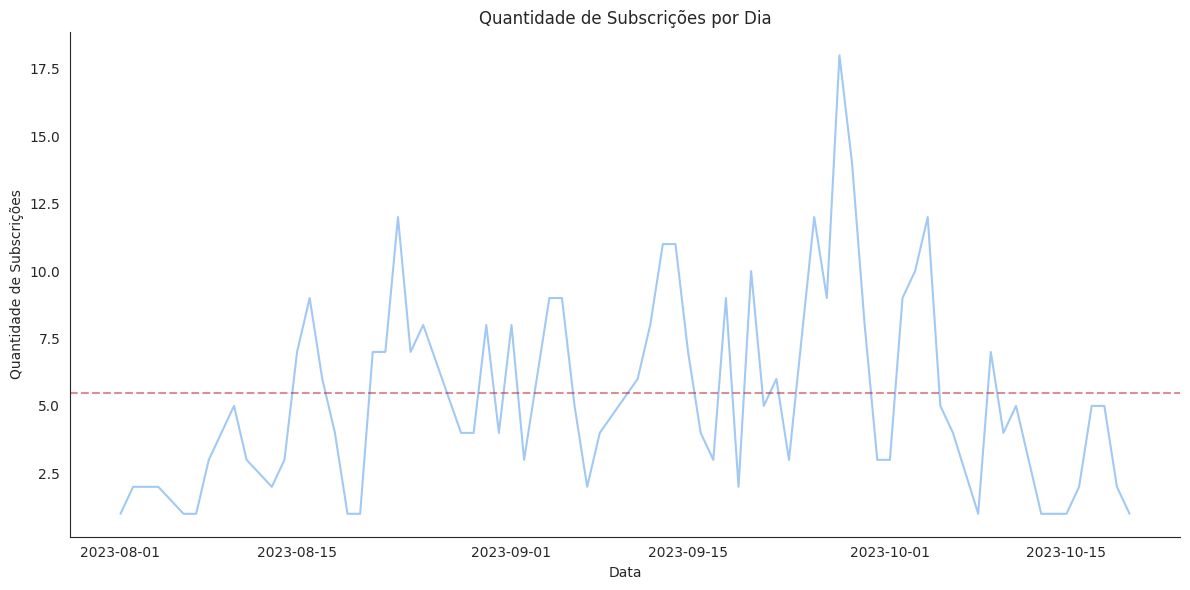

In [105]:
# Looking for variables in subscriptions dataset - Subscription date

# Convert object to datetime
subscriptions['SUBSCRIPTION_START_DATE'] = pd.to_datetime(subscriptions['SUBSCRIPTION_START_DATE'])

# Extract only date, without hour
subscriptions['Sub_start_date_clean'] = subscriptions['SUBSCRIPTION_START_DATE'].dt.date

sub_count_date = subscriptions['Sub_start_date_clean'].value_counts()

# Plot the chart
plt.figure(figsize=(12, 6))
sub_count_date.plot(kind= 'line')
plt.axhline(y= sub_count_date.mean(), color= 'firebrick', ls= '--', alpha= 0.5 )

plt.title('Quantidade de Subscrições por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Subscrições')
#plt.legend('Subscrições Iniciadas')
sns.despine(right= True)

plt.tight_layout()
plt.show()

In [106]:
# Analysing subscriptions per day statistics

sub_count_date.describe()

count    70.000000
mean      5.485714
std       3.666309
min       1.000000
25%       3.000000
50%       5.000000
75%       8.000000
max      18.000000
Name: Sub_start_date_clean, dtype: float64

**Avaliação das Assinaturas ao Longo do Tempo**

  * Não há um padrão específico ligado à data das inscrições, temos poucos dados disponíveis e o intervalo temporal é pequeno (aprox. 2 meses)

  * Há alguns picos e baixas no gráfico que podem estar relacionados a campanhas de marketing bem sucedidas e a finais de semana, respectivamente.

  * A média de assinaturas por dia (linha tracejada) é de 5,48 e a mediana é 5. O máximno de subscrições por dia é 18. Talvez se analisarmos apenas os dias úteis e excluirmos os finais de semana, esta média possa variar para cima.

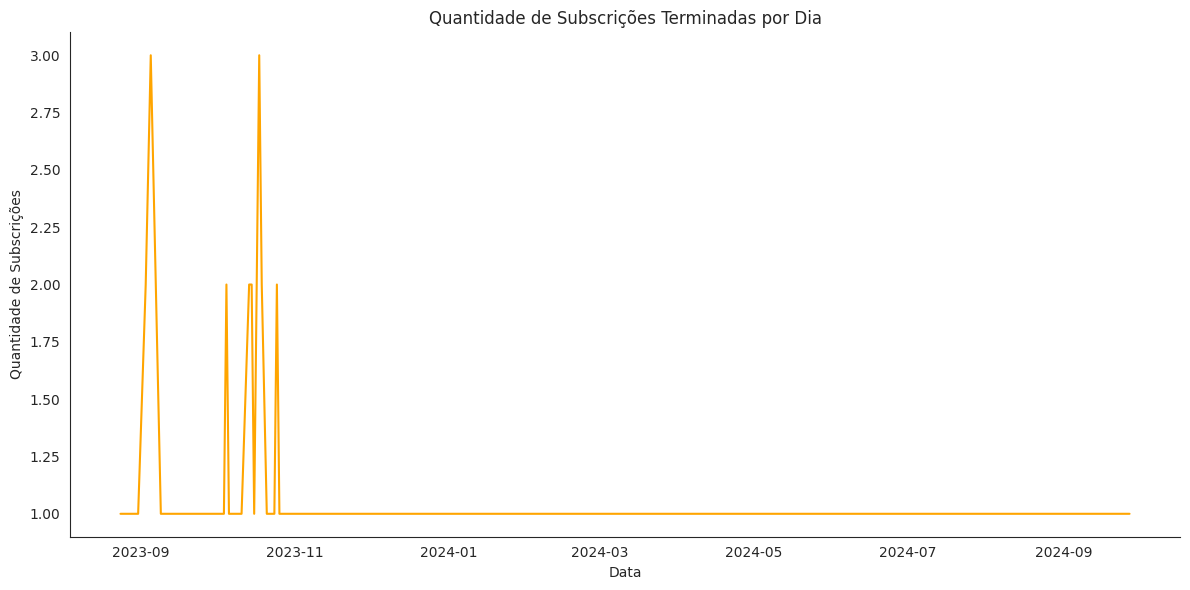

In [107]:
# Looking for variables in subscriptions dataset - subscription current period date

# Convert object to datetime
subscriptions['SUBSCRIPTION_END_DATE'] = pd.to_datetime(subscriptions['SUBSCRIPTION_END_DATE'])

# Extract only date, without time
subscriptions['Sub_end_date_clean'] = subscriptions['SUBSCRIPTION_END_DATE'].dt.date

end_count_date = subscriptions['Sub_end_date_clean'].value_counts()

# Plot the chart
plt.figure(figsize=(12, 6))
end_count_date.plot(kind= 'line', color= 'orange')

plt.title('Quantidade de Subscrições Terminadas por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Subscrições')
#plt.legend('Subscrições Terminad#')
sns.despine(right= True)

plt.tight_layout()
plt.show()


**Assinaturas Terminadas**

  * são poucos dados disponíveis e poucas assinaturas terminadas, possivelmente porque ainda é um produto novo e as clínicas ainda estão utilizando os períodos de teste.

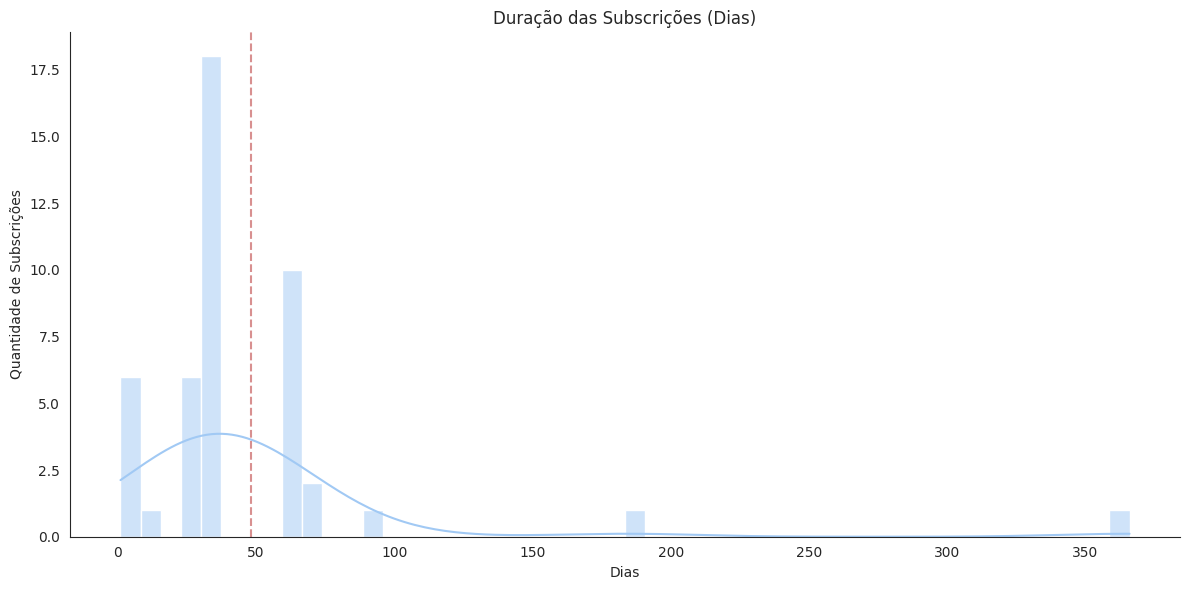

In [108]:
# Looking for subscription duration characteristics

subscriptions['SUBSCRIPTION_DURATION'] = (subscriptions['SUBSCRIPTION_END_DATE'] - subscriptions['SUBSCRIPTION_START_DATE']).dt.days

plt.figure(figsize=(12,6))

sns.histplot(data= subscriptions, x = 'SUBSCRIPTION_DURATION', bins= 50, kde= True)
plt.xlabel('Dias')
plt.ylabel('Quantidade de Subscrições')
plt.title('Duração das Subscrições (Dias)')
plt.axvline(x= subscriptions.SUBSCRIPTION_DURATION.mean(), color= 'firebrick', ls= '--', alpha= 0.5)

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [109]:
# Subscriptions duration statistics

subscriptions.SUBSCRIPTION_DURATION.describe()

count     46.000000
mean      48.173913
std       56.248379
min        1.000000
25%       30.000000
50%       36.000000
75%       61.000000
max      366.000000
Name: SUBSCRIPTION_DURATION, dtype: float64

**Tempo de Duração das Assinaturas**

  * Há uma variância grande de tempo das assinaturas, a maioria está no período inicial em torno dos 30 a 60 dias, mas algumas possuem mais tempo, chegando até quase 1 ano.
  
  * A média é 48 e a mediana é 36, evidenciando uma distribuição enviesada à esquerda, com predominância de valores de duração das assinatura baixos.

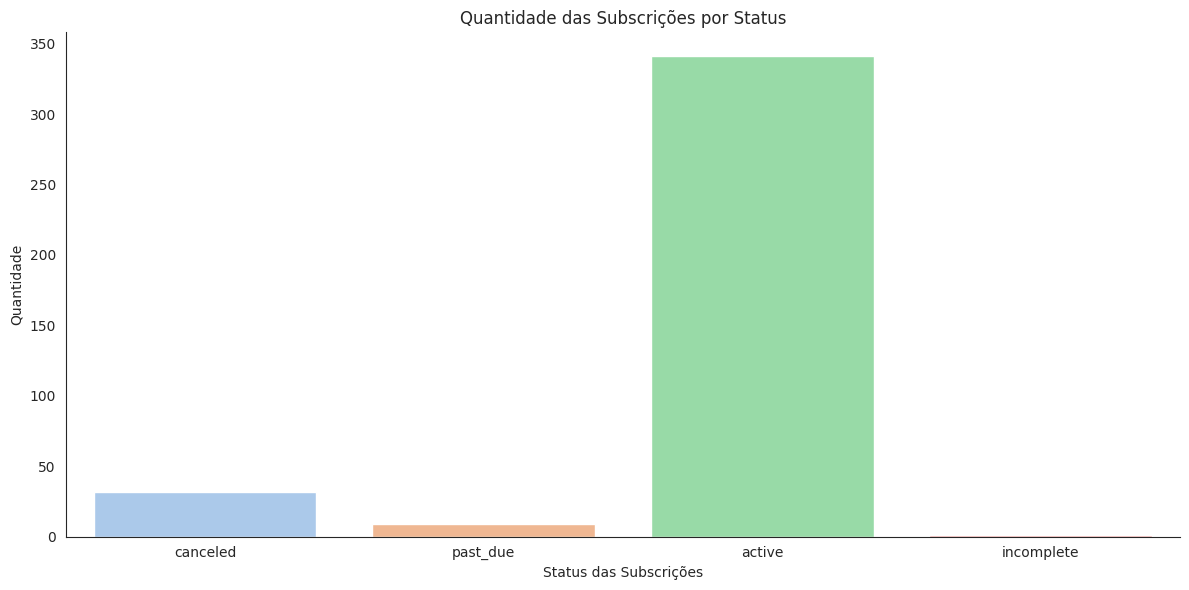

In [110]:
# Looking for subscription status characteristics

plt.figure(figsize=(12,6))

sns.countplot(data= subscriptions, x = 'SUBSCRIPTION_STATUS')
plt.xlabel('Status das Subscrições')
plt.ylabel('Quantidade')
plt.title('Quantidade das Subscrições por Status')

sns.despine(right=True)
plt.tight_layout()
plt.show()

**Status das Assinaturas**

  * A maior parte das assinaturas, quase 350, estão ativas. Há algumas poucas canceladas e poucas com status de atraso no pagamento.

  * Uma possível explicação é a recência do produto: um produto novo que está sendo bem aceito pela clientela, porém ainda não teve tempo de acumular assinaturas canceladas.

  * Outra hipótese é a real satisfação dos clientes assinantes com o serviço, ou seja: o sistema de Software As A Service (SAAS) está agregendo valor real à operação das clínicaas odontológicas que aderiram ao produto.

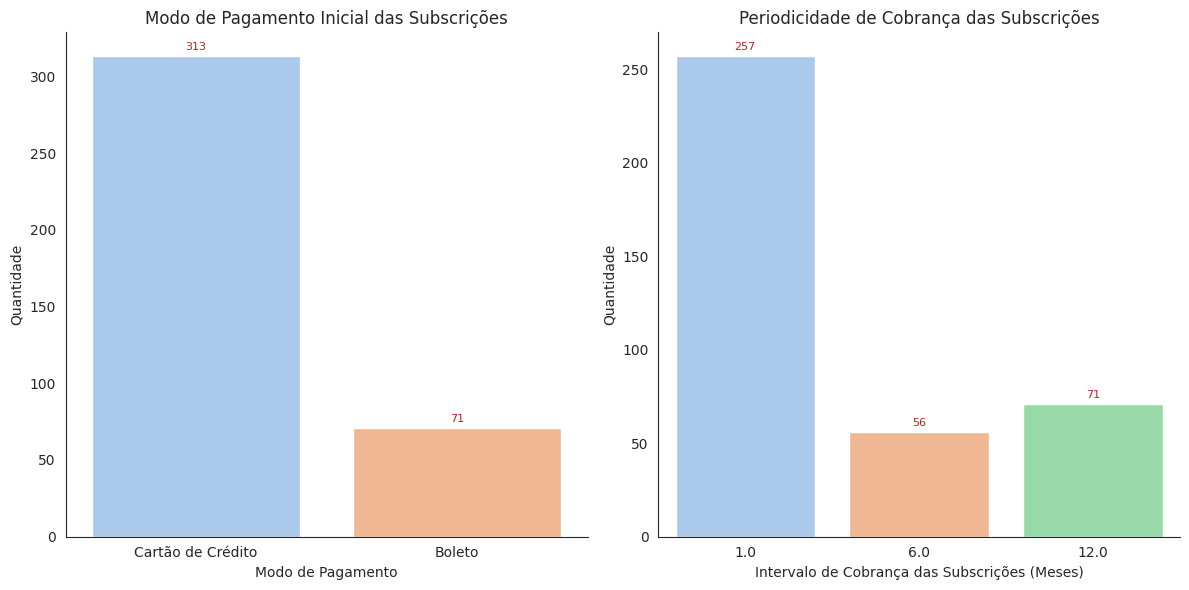

In [111]:
# Looking for subscription payment characteristics

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= subscriptions, x= 'FIRST_PAYMENT_METHOD_TYPE', ax= axes[0])
axes[0].set_title('Modo de Pagamento Inicial das Subscrições')
axes[0].set_xlabel('Modo de Pagamento')
axes[0].set_ylabel('Quantidade')

ax2= sns.countplot(data= subscriptions, x= 'BILLING_INTERVAL_IN_MONTHS', ax= axes[1])
axes[1].set_title('Periodicidade de Cobrança das Subscrições')
axes[1].set_xlabel('Intervalo de Cobrança das Subscrições (Meses)')
axes[1].set_ylabel('Quantidade')

ax1.bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
ax2.bar_label(ax2.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()


**Características de Pagamento das Subscrições**

  * A grande maioria das assinaturas são pagas com cartão de crédito, mas a opção com boleto também é importante, representando quase 20% dos clientes. Por se tratar de um serviço online, uma parte significativa dos clientes prefere usar boleto como forma de pagamento, talvez com medo de expor os dados de cartão no ambiente virtual, ou apenas preferem usar uma forma de pagamento que permita maior "controle" sobre as parcelas pagas.

  * A recorrência mais escolhida foi a mensal e em segundo lugar a anual. A existência ded descontos ou promoções para a aquisição dos planos semestrais ou anuais é uma prática comum neste tipo de serviço e, se incentivada, pode resultar em uma base de clientes que escolhem planos de longa recorrência e são, portanto, mais fiéis à plataforma.

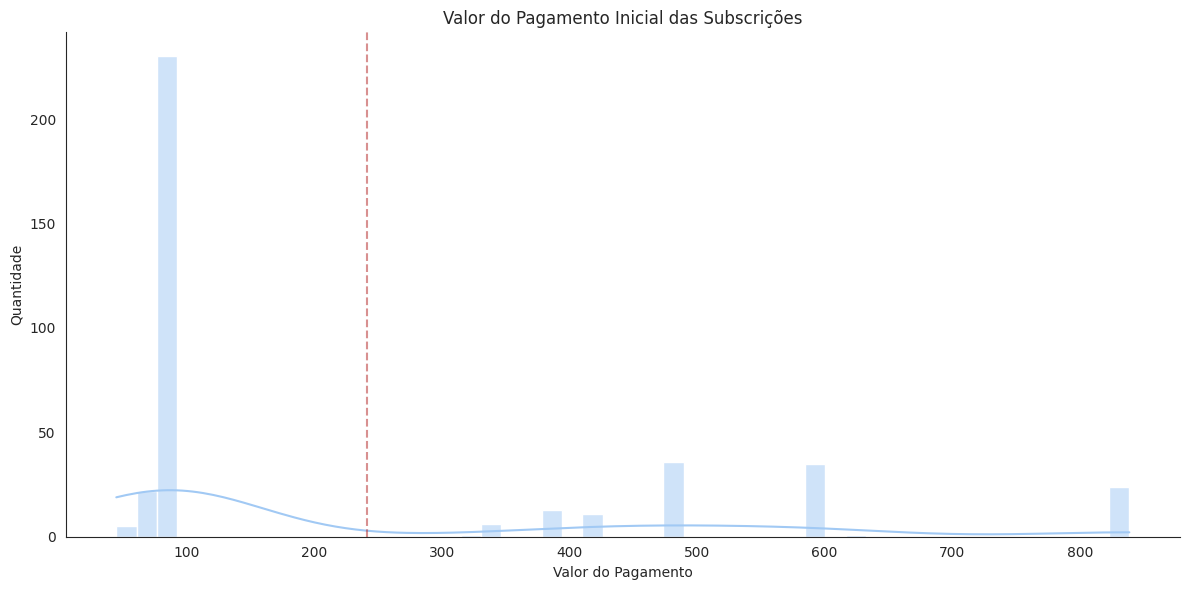

In [112]:
# Looking for subscription payment characteristics

plt.figure(figsize=(12,6))

sns.histplot(data= subscriptions, x = 'FIRST_PAYMENT_AMOUNT', bins= 50, kde= True)
plt.xlabel('Valor do Pagamento')
plt.ylabel('Quantidade')
plt.title('Valor do Pagamento Inicial das Subscrições')
plt.axvline(x= subscriptions.FIRST_PAYMENT_AMOUNT.mean(), color= 'firebrick', ls= '--', alpha= 0.5)

sns.despine(right=True)
plt.tight_layout()
plt.show()

In [113]:
subscriptions['FIRST_PAYMENT_AMOUNT'].describe()

count    384.000000
mean     241.678958
std      238.445196
min       44.950000
25%       89.900000
50%       89.900000
75%      434.400000
max      838.800000
Name: FIRST_PAYMENT_AMOUNT, dtype: float64

In [114]:
subscriptions['FIRST_PAYMENT_AMOUNT'].value_counts()

89.90     229
479.40     36
587.16     35
838.80     24
62.93      19
383.52     13
419.40     11
335.58      6
44.95       5
71.92       3
319.60      1
79.90       1
629.10      1
Name: FIRST_PAYMENT_AMOUNT, dtype: int64

**Valor do Pagamento Inicial das Assinaturas**

  * A grande maioria dos pagamentos iniciais se concentra no valor 89,90.

  * Há uma concentração em torno do valor 479,40 e 587,16 e um outro pico no valor 838,80 o que pode indicar aqueles clientes que escolhem a recorrência semestral ou anual, respectivamente.

  * Os clientes que fazem pagamentos de períodos maiores acabam puxando a média para cima, ficando em 241,67, porém a mediana é 89,90. Isso indica uma distribuição enviesada à esquerda, com maior quantidade de valores baixos.

###Análise do Dataset Clinics

In [115]:
#Changing date columns datatypes

clinics['CLINIC_CREATED_AT'] = pd.to_datetime(clinics['CLINIC_CREATED_AT'])
clinics['TRIAL_START_DATE'] = pd.to_datetime(clinics['TRIAL_START_DATE'])
clinics['TRIAL_END_DATE'] = pd.to_datetime(clinics['TRIAL_END_DATE'])
clinics['REQUEST_FINISHED_AT'] = pd.to_datetime(clinics['REQUEST_FINISHED_AT'])
clinics['ACCREDITATION_REQUESTED_AT'] = pd.to_datetime(clinics['ACCREDITATION_REQUESTED_AT'])
clinics['ACCREDITATION_APPROVED_AT'] = pd.to_datetime(clinics['ACCREDITATION_APPROVED_AT'])
clinics['ACCREDITATION_REJECTED_AT'] = pd.to_datetime(clinics['ACCREDITATION_REJECTED_AT'])

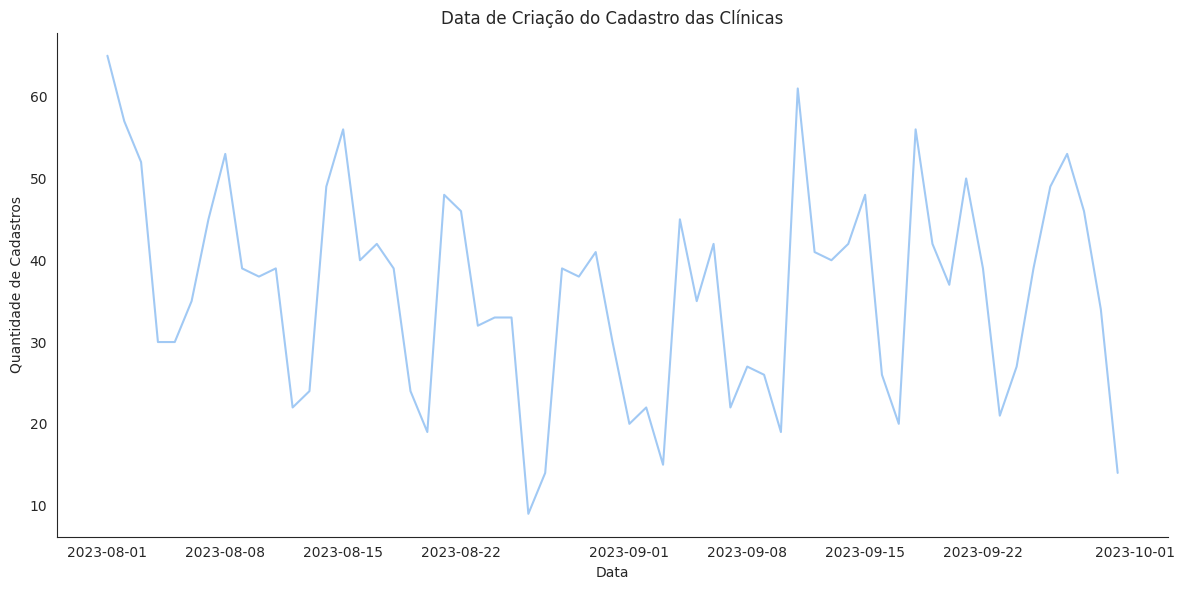

In [116]:
#Looking for created time

plt.figure(figsize=(12,6))
clinics['CLINIC_CREATED_AT'].dt.date.value_counts().plot(kind= 'line')
plt.title('Data de Criação do Cadastro das Clínicas')
plt.xlabel('Data')
plt.ylabel('Quantidade de Cadastros')
sns.despine(right= True)

plt.tight_layout()
plt.show()

**Data de Cadastro das Clínicas**

  * Em relação à data de criação dos cadastros, vale o mesmo que foi dito na análise das subscrições: Não se percebe um padrão evidente de distribuição ao longo do tempo, porém existem picos e vales no gráfico que podem indicar períodos onde há mais campanhas de marketing e finais de semana, respectivamente.

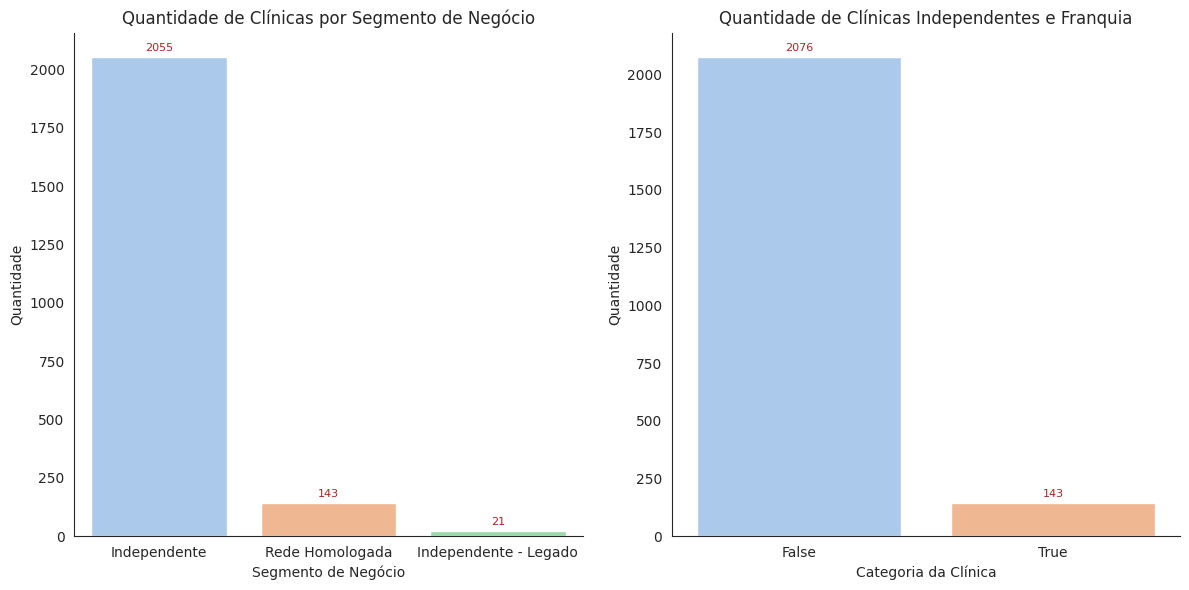

In [117]:
#Looking for clinics categories

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= clinics, x= 'BUSINESS_SEGMENTATION', ax= axes[0])
axes[0].set_title('Quantidade de Clínicas por Segmento de Negócio')
axes[0].set_xlabel('Segmento de Negócio')
axes[0].set_ylabel('Quantidade')

ax2= sns.countplot(data= clinics, x= 'IS_CHAIN_CLINIC',ax= axes[1])
axes[1].set_title('Quantidade de Clínicas Independentes e Franquia')
axes[1].set_xlabel('Categoria da Clínica')
axes[1].set_ylabel('Quantidade')

ax1.bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
ax2.bar_label(ax2.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Categoria das Clínicas Cadastradas**

  * A grande maioria das clínicas cadastradas são independentes, mais de 2 mil, e há algo em torno de 150 clínicas que são franquias. Há uma outra categoria pequena de clínicas que são independentes e consideradas legado, talvez de alguma operação anterior à atual.

In [118]:
percentages = clinics['IS_CHAIN_CLINIC'].value_counts() / clinics['IS_CHAIN_CLINIC'].shape[0] * 100
percentages

False    93.555656
True      6.444344
Name: IS_CHAIN_CLINIC, dtype: float64

**Percentual das Clínicas Independentes X Franquias**

  * 93,6% das clinicas cadastradas são independentes, representam o maior público que utiliza o serviço oferecido.

  * Apenas 6,4% dos cadastros são redes ou  franquias que não utilizam todas as funcionalidades do produto, porém utilizam o sistema de finaciamebto BNPL (Buy Now Pay Later). Esse grupo de clínicas deverá ser avaliado separadamente, pois não utilizam a totalidade do serviço e são oriundos de convênios entre empresas.

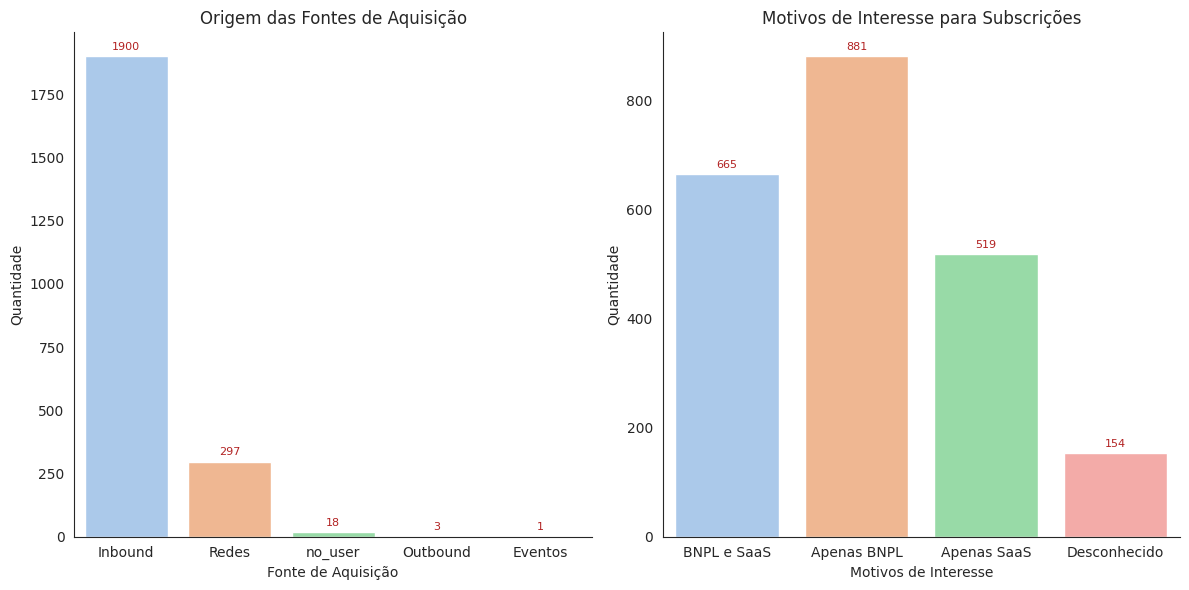

In [119]:
# Ploting the aquisition font

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= clinics, x= 'FIRST_USER_HUBSPOT_SOURCE', ax= axes[0])
axes[0].set_title('Origem das Fontes de Aquisição')
axes[0].set_xlabel('Fonte de Aquisição')
axes[0].set_ylabel('Quantidade')

ax2= sns.countplot(data= clinics, x= 'INTEREST_CATEGORY_SIGNUP',ax= axes[1])
axes[1].set_title('Motivos de Interesse para Subscrições')
axes[1].set_xlabel('Motivos de Interesse')
axes[1].set_ylabel('Quantidade')

ax1.bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
ax2.bar_label(ax2.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Origem e Motivo Principal da Aquisição**

  * A principal fonte de aquisição de clientes é de origem Inbound, ou seja, de algum consultor ou agente de vendas que faz contato e traz os possíveis leads e clientes em potencial para o serviço.

  * A segunda fonte de aquisição é através de campanhas de marketing em redes sociais e anúncios na internet.

  * Há uma relativa preferência do serviço de financiamento BNPL ao adquirir a assinatura. Digo relativo, pois precisamos excluir as clínicas franqueadas desta análise.

  * Em segundo lugar o motivo que leva à aquisição é decklarado como interesse no serviço BNPL e no Saas e suas funcionalidades.

  * Há também uma quantidade grande de clientes que declaram como motivo apenas o interesse no Saas.

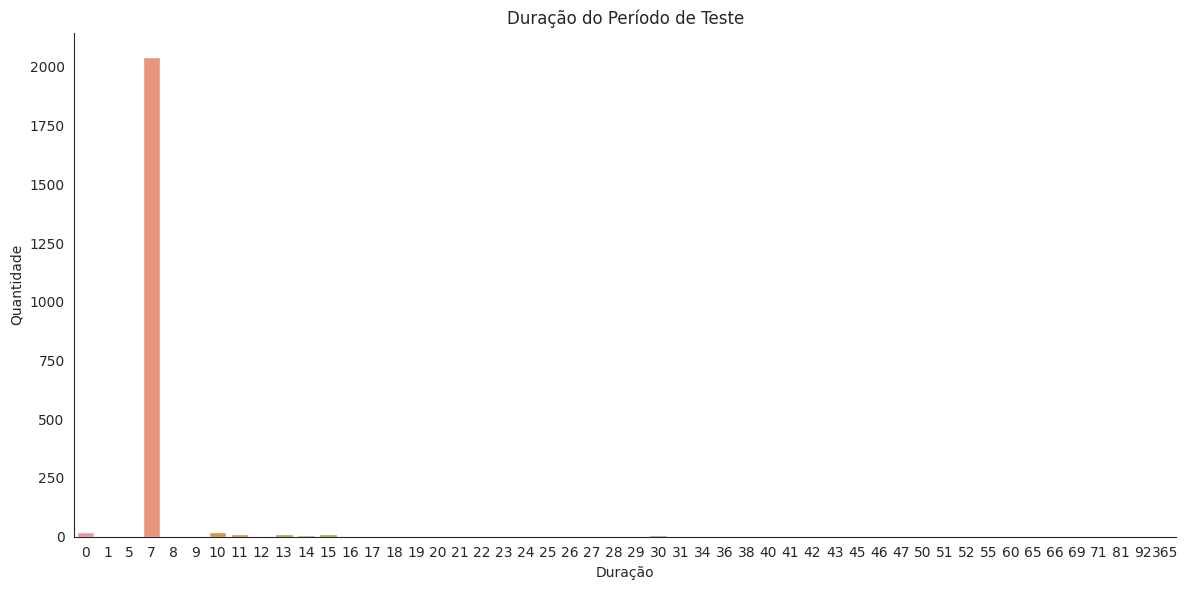

In [120]:
# Investigating the Trial Duration

plt.figure(figsize=(12, 6))
sns.countplot(data= clinics, x= 'TRIAL_DURATION')
plt.title('Duração do Período de Teste')
plt.xlabel('Duração')
plt.ylabel('Quantidade')
sns.despine(right=True)

plt.tight_layout()
plt.show()

In [121]:
clinics.TRIAL_DURATION.describe()

count    2219.000000
mean        8.388463
std        12.314432
min         0.000000
25%         7.000000
50%         7.000000
75%         7.000000
max       365.000000
Name: TRIAL_DURATION, dtype: float64

**Duração do Período de Teste**

  * A esmagadora maioria dos períodos de teste dura apenas 7 dias. Este período escolhido pela empresa para ser gratuito e para os clientes testarem, apesar de curto, parece suficiente para persuadir o cliente a virar um assinante.

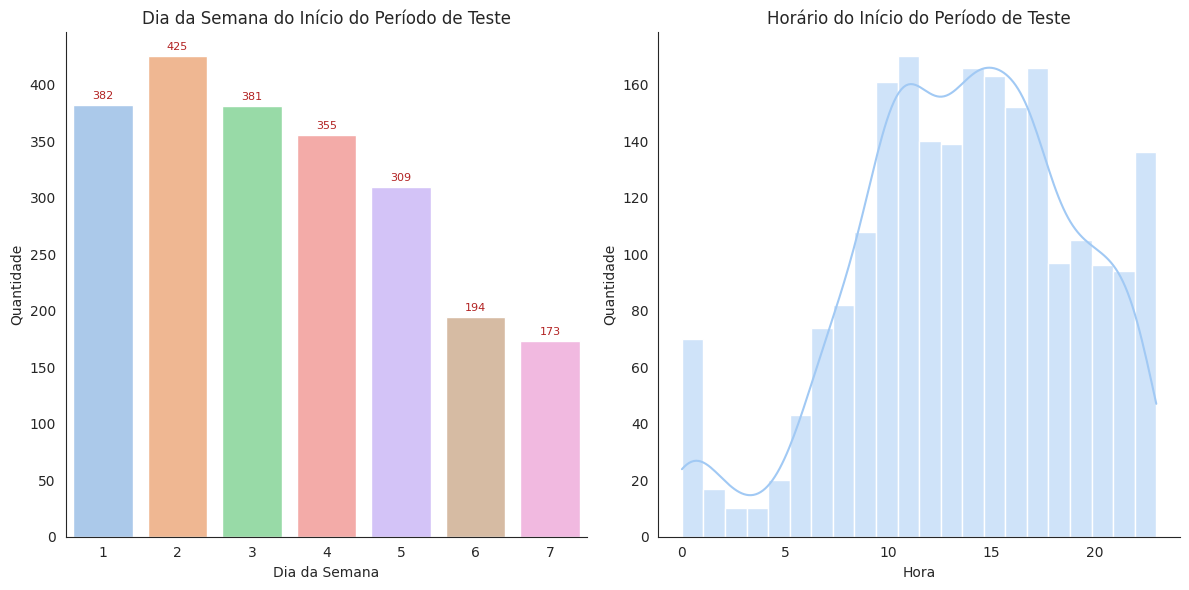

In [122]:
# Investigating the trial start day and hour

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= clinics, x= 'TRIAL_START_DAY_OF_WEEK', ax= axes[0])
axes[0].set_title('Dia da Semana do Início do Período de Teste')
axes[0].set_xlabel('Dia da Semana')
axes[0].set_ylabel('Quantidade')

ax2= sns.histplot(data= clinics, x= 'TRIAL_START_HOUR', kde= True, ax= axes[1])
axes[1].set_title('Horário do Início do Período de Teste')
axes[1].set_xlabel('Hora')
axes[1].set_ylabel('Quantidade')

ax1.bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
#ax2.bar_label(ax2.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Dia e Hora de Início do Período de Testes**

  * Considerando o dia 1 como segunda-feira e o dia 7 como domingo, há uma maior ocorrência de clientes iniciando seus períodos nos dias úteis e uma diminuição dos leads em dias de final de semana. De Acordo com o gráfico, o dia que mais atrai clientes é a terça-feira.

  * Assim como há uma preferência pelos dias úteis, também há uma nítida preferência por iniciar o período de teste durante o horário comercial, sendo os picos de novos clientes nos horários em torno das 10 horas da manhã e das 15 horas da tarde.

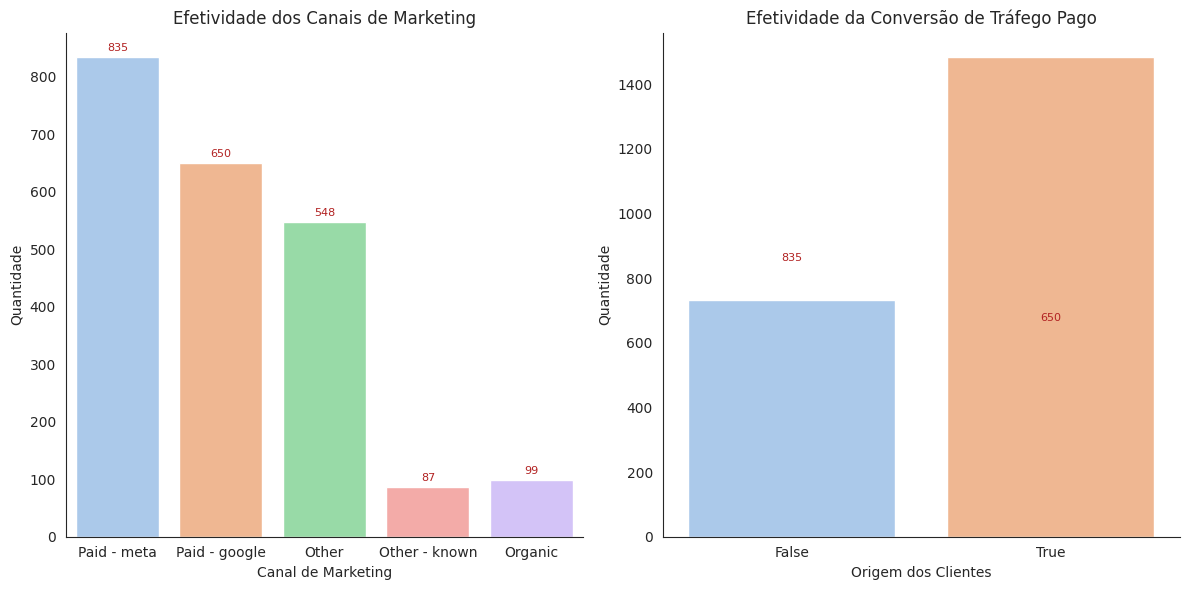

In [123]:
# Analysing the effectiveness of marketing campains

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= clinics, x= 'MARKETING_ATTRIBUITION_CHANNEL_GROUP', ax= axes[0])
axes[0].set_title('Efetividade dos Canais de Marketing')
axes[0].set_xlabel('Canal de Marketing')
axes[0].set_ylabel('Quantidade')

ax2= sns.countplot(data= clinics, x= 'IS_PAID_MEDIUM', ax= axes[1])
axes[1].set_title('Efetividade da Conversão de Tráfego Pago')
axes[1].set_xlabel('Origem dos Clientes')
axes[1].set_ylabel('Quantidade')

axes[0].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
axes[1].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Efetividade das Campanhas de Marketing**

  * Há uma grande efetividade das campanhas de marketing pagas, principalmente através das redes sociais da Meta e dos anúncios pagos no Google. Essa informação é bastante relevante para direcionar os investimentos de marketing nos canais que mais levam à trafego e conversão.

  * Assim também fica evidente no segundo gráfico que há uma efetividade do tráfego pago na aquisição de leads.

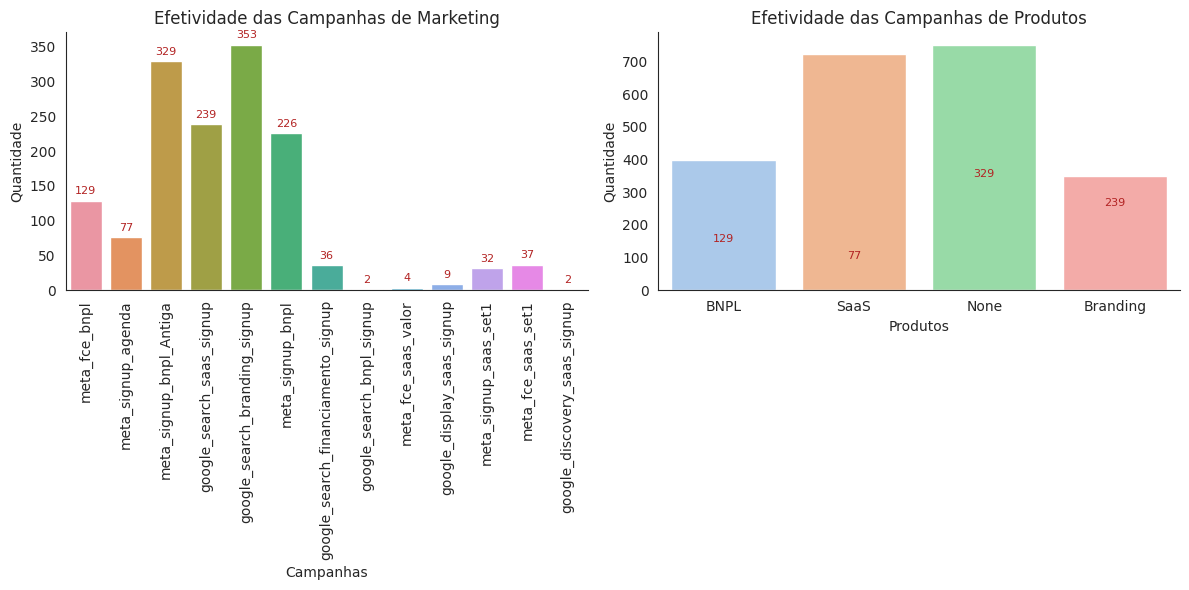

In [124]:
# Analysing the effectiveness of especific marketing campains

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= clinics, x= 'MARKETING_ATTRIBUITION_CAMPAIGN', ax= axes[0])
axes[0].set_title('Efetividade das Campanhas de Marketing')
axes[0].set_xlabel('Campanhas')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis= 'x', labelrotation= 90)

ax2= sns.countplot(data= clinics, x= 'MARKETING_ATTRIBUITION_CAMPAIGN_PRODUCT', ax= axes[1])
axes[1].set_title('Efetividade das Campanhas de Produtos')
axes[1].set_xlabel('Produtos')
axes[1].set_ylabel('Quantidade')

axes[0].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
axes[1].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Efetividade de Campanhas Específicas de Marketing**

  * Algumas campanhas mais focadas e específicas são mais efetivas que outras, por exemplo as campanhas pagas no Google e Meta que são focadas em apresentar os serviços de Saas e BNPL. Caso cruzássemos estes valores com informações mais detalhadas sobre as campanhas, seria possível inferir melhor o resultado delas em converter leads e qual o custo por conversão, possibilitando dirigir melhor os investimentos.


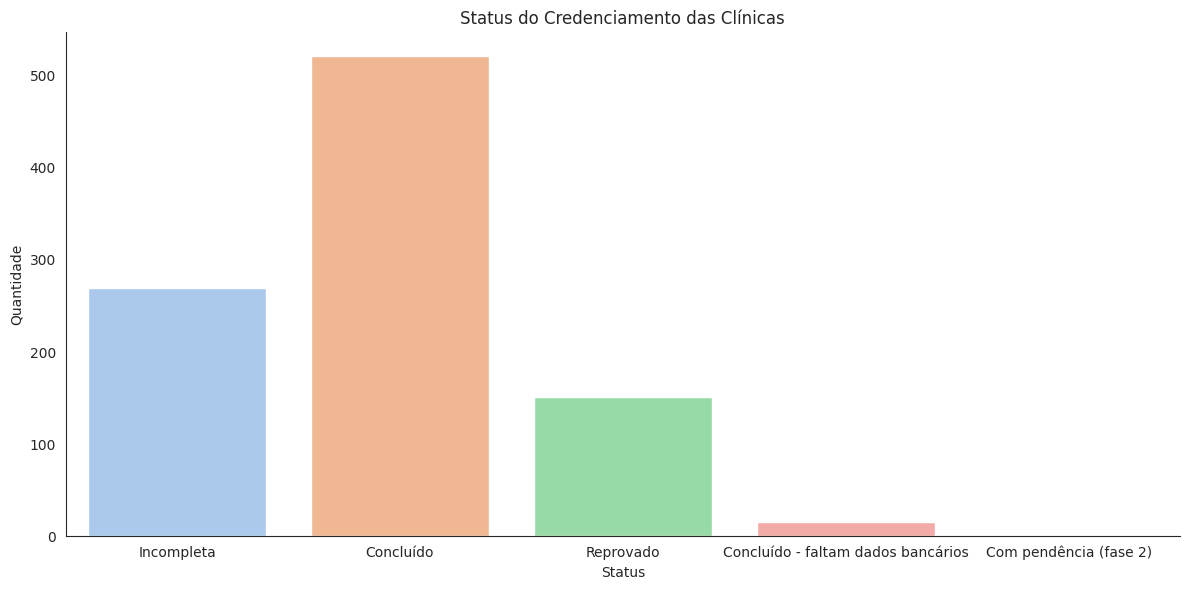

In [125]:
# Investigating the accreditation status

plt.figure(figsize=(12, 6))
sns.countplot(data= clinics, x= 'CLINIC_ACCREDITATION_STATUS')
plt.title('Status do Credenciamento das Clínicas')
plt.xlabel('Status')
plt.ylabel('Quantidade')
sns.despine(right=True)

plt.tight_layout()
plt.show()


**Status do Processo de Credenciamento das Clínicas**

  * A maior parte dos cadastramentos são concluídos com sucesso. Há uma grande quantidade de cadastros incompletos e uma quantidade menor de cadastros reprovados.

  * Implementar algum tipo de lembrete por e-mail ou mensagem aos clientes que iniciaram o cadastramento e não o concluíram, pode aumentar o número de cadastros concluídos. Também é possível avaliar quais foram os motivos que levaram à reprovação de um cadastro e entrar em contato com estes clientes para ajudá-los a providenciar as informações e documentos necessários de uma forma mais célere.

###Análise do Dataset Activity

In [126]:
activity.columns

Index(['CLINIC_ID', 'ACTIVITY_AT', 'ACTIVITY_TYPE', 'FEATURE', 'MODULE',
       'ANALYTICS_DOMAIN', 'IS_TRANSACTION', 'IS_BNPL_ACTIVITY',
       'IS_VALID_ACTIVITY', 'IS_DELETION_ACTIVITY', 'IS_MANAGEMENT_ACTIVITY',
       'IS_FINANCE_ACTIVITY'],
      dtype='object')

In [127]:
# Changing datatype of date columns

activity.ACTIVITY_AT = pd.to_datetime(activity.ACTIVITY_AT)


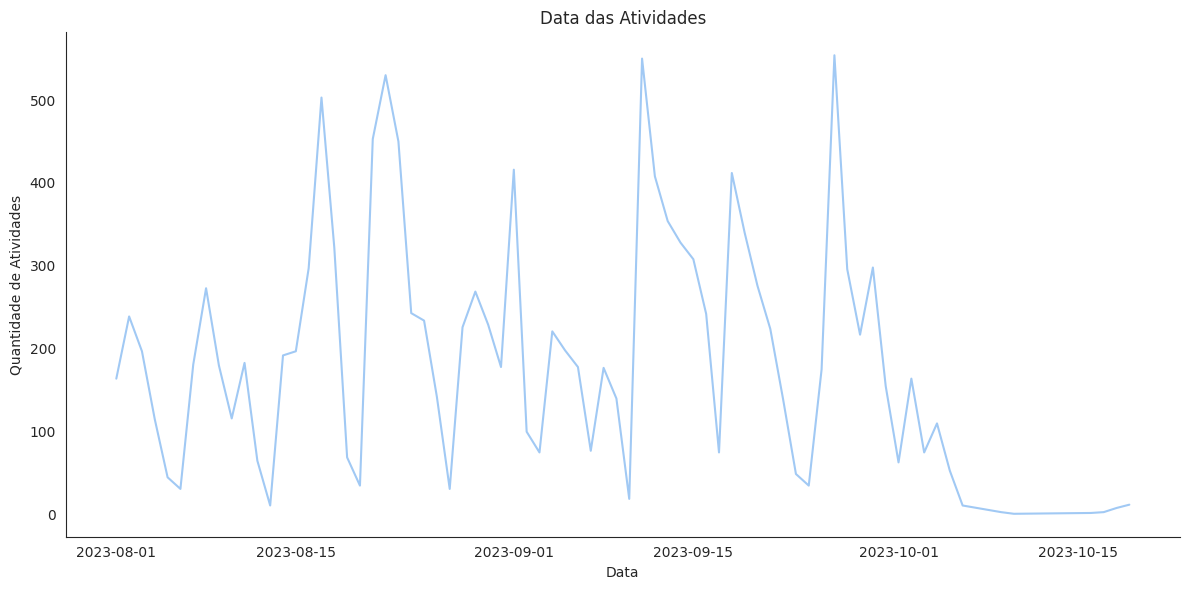

In [128]:
# Looking for activity time

plt.figure(figsize=(12,6))
activity['ACTIVITY_AT'].dt.date.value_counts().plot(kind= 'line')
plt.title('Data das Atividades')
plt.xlabel('Data')
plt.ylabel('Quantidade de Atividades')
sns.despine(right= True)

plt.tight_layout()
plt.show()

**Avaliação das Atividades dos Assinantes ao Longo do Tempo**

  * Assim como na análise temporal das subscrições e dos cadastros das clínicas, não há um padrão específico ligado à data das atividades. Além disso, temos poucos dados disponíveis e o intervalo temporal é pequeno (aprox. 2 meses)

  * Há alguns picos e baixas no gráfico que podem estar relacionados a campanhas de marketing bem sucedidas e a finais de semana, respectivamente.


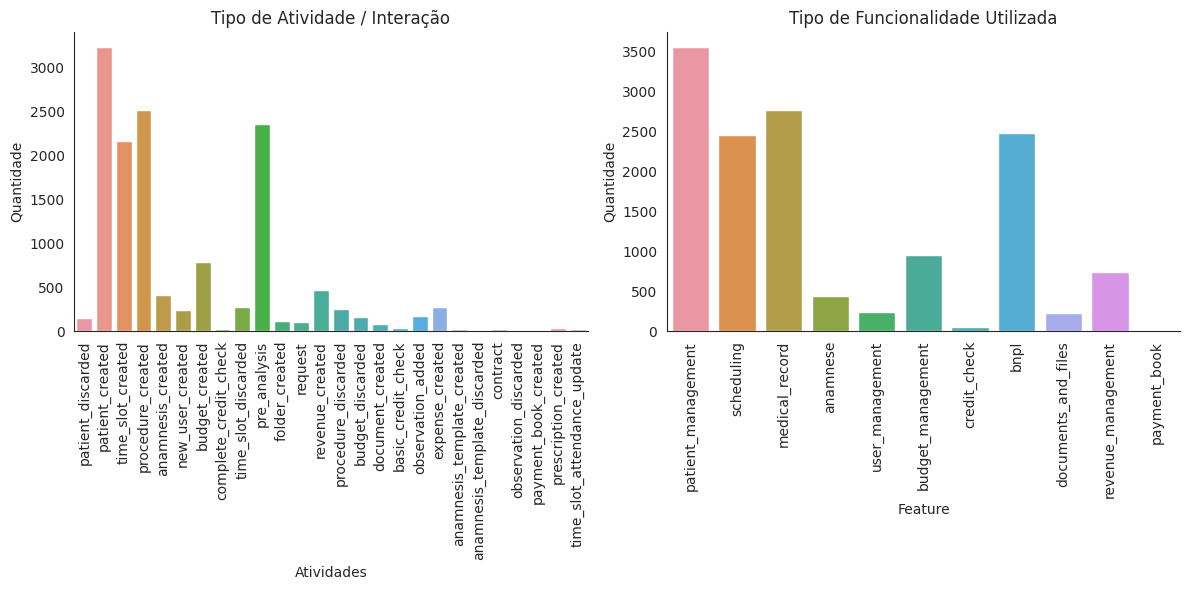

In [129]:
# Analysing the activity category

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= activity, x= 'ACTIVITY_TYPE', ax= axes[0])
axes[0].set_title('Tipo de Atividade / Interação')
axes[0].set_xlabel('Atividades')
axes[0].set_ylabel('Quantidade')
axes[0].tick_params(axis= 'x', labelrotation= 90)

ax2= sns.countplot(data= activity, x= 'FEATURE', ax= axes[1])
axes[1].set_title('Tipo de Funcionalidade Utilizada')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Quantidade')
axes[1].tick_params(axis= 'x', labelrotation= 90)

#axes[0].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
#axes[1].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()

**Tipos de Atividades e Funcionalidades Utilizadas na Plataforma**

  * As atividades mais utilizadas são aquelas que tem relação com o cadastro de pacientes, agendamento e procedimentos. Outra função bastante utilizada é a pré análise, possivelmente uma pré análise para utilizar o financiamento BNPL.

  * As features ou módulos mais utilizados na plataforma são as relacionadas à gestão dos pacientes, agendamento e BNPL, confirmando o que foi realizado nas atividades.

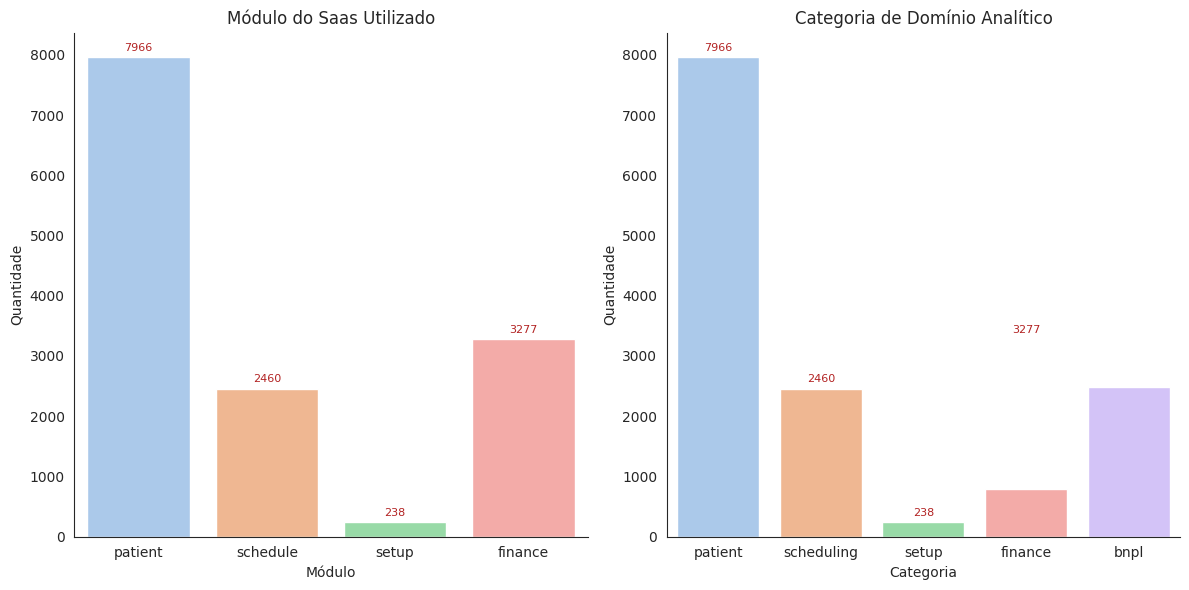

In [130]:
# MODULE

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
ax1= sns.countplot(data= activity, x= 'MODULE', ax= axes[0])
axes[0].set_title('Módulo do Saas Utilizado')
axes[0].set_xlabel('Módulo')
axes[0].set_ylabel('Quantidade')

ax2= sns.countplot(data= activity, x= 'ANALYTICS_DOMAIN', ax= axes[1])
axes[1].set_title('Categoria de Domínio Analítico')
axes[1].set_xlabel('Categoria')
axes[1].set_ylabel('Quantidade')

axes[0].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)
axes[1].bar_label(ax1.containers[0], fontsize= 8, color= 'firebrick', padding= 3)

sns.despine(right=True)

plt.tight_layout()
plt.show()


**Módulos e Funcionalidades Utilizadas na Plataforma**

  * Os módulos mais utilizados são aqueles que possuem relação com a gestão dos pacientes, agendamento e finanças. Esta informação pode ser relevante para aprimorar ainda mais estes módulos, oferecendo aos clientes mais facilidade de uso e mais funções que ajudem na gestão do dia a dia das clínicas.

##KPIs - Key Performance Indicators

  * Olhar para as inscrições e avaliar a taxa de conversão.
  
  * Avaliar o tempo transcorrido entre a inscrição e a assinatura ou desistência.

  * Entender o perfil da clínica que assina / desiste, quais serviços e de que tipo são oferecidos?

  * A oferta de financiamento próprio é uma variável importante para a permanência da clínica no serviço?

  * Quais os serviços ofertados que são mais decisivos para a permanência ds clínicas?

###Taxa de conversão

Medição da proporção de clínicas que decidem asinar o serviço após passar pelo período de trial.

KPI importante para medir a eficácia do período de teste em converter clientes assinantes. Uma taxa alta é desejável e indica a satisfação do cliente em continuar com o serviço após experimentar o serviço.


###Taxa de retenção das assinaturas

Mede a quantidade de clientes que renovaram suas assinaturas após o primeiro período de cobrança.

KPI importante para avaliar a satisfação do cliente a longo prazo. Uma taxa de retenção alta indica que o serviço oferecido está atendendo a necessidade dos clientes, enquanto uma taxa baixa indica que os clientes não estão percebendo como o produto pode agregar valor às suas operações.

###Nível de atividade / interação durante o período de teste

Indica quão engajadas as clínicas estão em utilizar os serviços oferecidos durante o período de teste.

KPI importante para avaliar se o produto oferece atratividade e qual o tamanho deo interesse dos clientes pelo serviço oferecido.

###Taxa de re-ativação do serviço

Após cancelar o serviço, quantos clientes decidem retornar às assinaturas e quanto tempo depois eles retornam? Ou não retornam?

KPI importante para medir se os clientes cancelam as assinaturas por algum motivo e se elas são canceladas após o período de teste ou algum tempo depois. Mede o interesse dos clientes após repensarem a decisão de continuar ou desistir do serviço.

##Preparação dos Dados para Dashboard

In [131]:
# Fazendo merge dos datasets

# O dataset clinics deve ser usado em primeiro lugar (left join) pois ele contém 2219 diferentes ids, enquanto o activities possui 13941 linhas
act_cli_merge = pd.merge(activity, clinics, on= 'CLINIC_ID', how= 'left')

# Apenas 1070 diferentes ids produziram atividades e apenas 383 foram de fato inscritos
act_cli_subs_merge = pd.merge(act_cli_merge, subscriptions, on='CLINIC_ID', how= 'left')

act_cli_subs_merge.shape

(13941, 64)

In [132]:
# Removendo as linhas de clínicas que são franquias

df_cleaned = act_cli_subs_merge[act_cli_subs_merge['IS_CHAIN_CLINIC'] == False]

In [133]:
# Terminamos o merge com 12421 linhas em 64 colunas, vamos avaliar se há colunas desnecessárias e removê-las
# Também ajustar datatypes caso seja necessário

df_cleaned.shape

(12421, 64)

In [134]:
df_cleaned.FIRST_PAYMENT_COUPON_ID

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
13936    NaN
13937    NaN
13938    NaN
13939    NaN
13940    NaN
Name: FIRST_PAYMENT_COUPON_ID, Length: 12421, dtype: object

In [135]:
# Dropping unnecessary columns

cols_drop = ['Sub_start_date_clean', 'Sub_end_date_clean', 'FIRST_PAYMENT_AMOUNT_OFF',
'FIRST_PAYMENT_PROMOTION_CODE', 'FIRST_PAYMENT_COUPON_ID',
'FIRST_PAYMENT_AMOUNT_OFF_2']

df_clean = df_cleaned.drop(columns= cols_drop)


In [136]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12421 entries, 0 to 13940
Data columns (total 58 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   CLINIC_ID                                   12421 non-null  int64         
 1   ACTIVITY_AT                                 12421 non-null  datetime64[ns]
 2   ACTIVITY_TYPE                               12421 non-null  object        
 3   FEATURE                                     12421 non-null  object        
 4   MODULE                                      12421 non-null  object        
 5   ANALYTICS_DOMAIN                            12421 non-null  object        
 6   IS_TRANSACTION                              12421 non-null  bool          
 7   IS_BNPL_ACTIVITY                            12421 non-null  bool          
 8   IS_VALID_ACTIVITY                           12421 non-null  bool          
 9   IS_DEL

In [137]:
# Modelo de dados pronto e exportado

df_clean.to_csv('Modelo_Dashboard.csv')

##Calculando Métricas KPIs

In [159]:
# TAXA DE CONVERSÃO

# Separando apenas as asssinaturas com status ativas e linhas não nulas
cadastros_clinicas = df_clean[df_clean['SUBSCRIPTION_START_DATE'].notnull()]

# Calculando a taxa de conversão (total de clínicas ativas / total de clínicas cadatradas) ->Ids únicos

clinicas_ativas = cadastros_clinicas['CLINIC_ID'].nunique()

clinicas_cadastradas = df_clean['CLINIC_ID'].nunique()

taxa_conversao = round(clinicas_ativas / clinicas_cadastradas * 100, 2)

display(f'O total de clínicas ativas é {clinicas_ativas}')
display(f'O total de clínicas cadastradas {clinicas_cadastradas}')

display(f'A taxa de conversão de assinaturas é de {taxa_conversao} %')

'O total de clínicas ativas é 270'

'O total de clínicas cadastradas 983'

'A taxa de conversão de assinaturas é de 27.47 %'

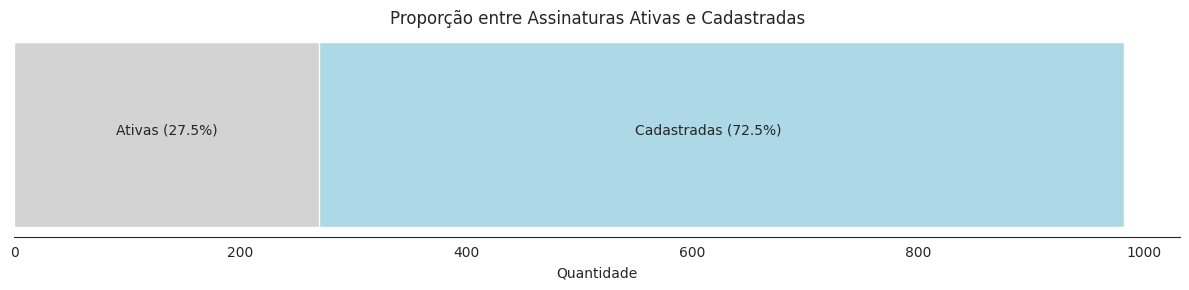

In [216]:
# PLotando um gráfico de barras empilhado horizontalmente, mostrando a proporção entre os cadastros e as assinaturas

fig, ax = plt.subplots(figsize=(12,3))

ax.barh(width= [clinicas_cadastradas, clinicas_ativas], y= 1, color= ['lightblue', 'lightgray'])
ax.text(90, 1, 'Ativas (27.5%)')
ax.text(550, 1, 'Cadastradas (72.5%)')
ax.set_xlabel('Quantidade')
ax.set_title('Proporção entre Assinaturas Ativas e Cadastradas')
ax.set_yticks([])

sns.despine(right= True, left= True)
plt.tight_layout()
plt.show()

In [221]:
# Calculando a taxa de retenção, quantos clientes renovaram suas assinaturas após o primeiro pagamento

renovacoes = cadastros_clinicas[cadastros_clinicas['SUBSCRIPTION_DURATION'] > cadastros_clinicas['BILLING_INTERVAL_IN_MONTHS']]

clinicas_assinantes = cadastros_clinicas['CLINIC_ID'].nunique()
clinicas_renovacoes = renovacoes['CLINIC_ID'].nunique()

tx_retencao = round(clinicas_renovacoes / clinicas_assinantes * 100, 2)

display(f'O total de assinaturas ativas é {clinicas_assinantes}')
display(f'O total de assinaturas renovadas é {clinicas_renovacoes}')

display(f'A taxa de retençao de assinaturas é de {tx_retencao} %')


'O total de assinaturas ativas é 270'

'O total de assinaturas renovadas é 33'

'A taxa de retençao de assinaturas é de 12.22 %'

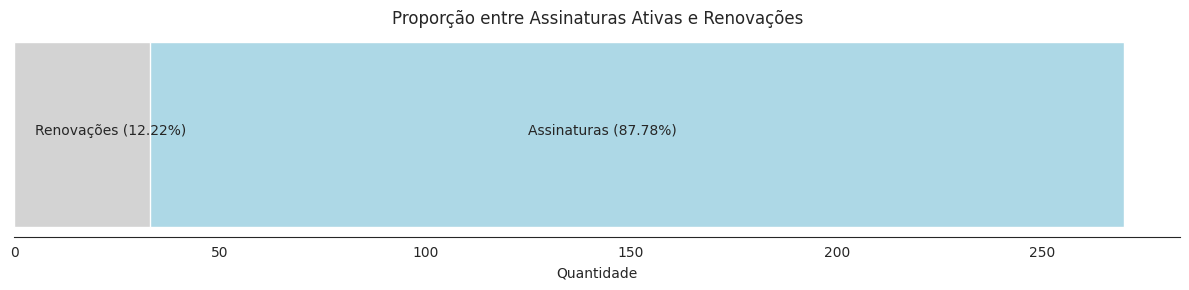

In [230]:
# PLotando um gráfico de barras empilhado horizontalmente, mostrando a proporção entre assinaturas e assinaturas renovadas

fig, ax = plt.subplots(figsize=(12,3))

ax.barh(width= [clinicas_assinantes, clinicas_renovacoes], y= 1, color= ['lightblue', 'lightgray'])
ax.text(5, 1, 'Renovações (12.22%)')
ax.text(125, 1, 'Assinaturas (87.78%)')
ax.set_xlabel('Quantidade')
ax.set_title('Proporção entre Assinaturas Ativas e Renovações')
ax.set_yticks([])

sns.despine(right= True, left= True)
plt.tight_layout()
plt.show()

In [147]:
# Calculando a taxa de interação / atividade média dos clientes com a plataforma

tx_interacao = df_clean[df_clean['IS_VALID_ACTIVITY']].groupby(by= ['CLINIC_ID']).size().mean()

display(f'A taxa média de interações com a plataforma é {round(tx_interacao, 2)} vezes')

'A taxa média de interações com a plataforma é 9.57 vezes'

In [218]:
# Calculando a taxa de ativação pós trial e taxa de cancelamento pós trial

subscribe_after = cadastros_clinicas[(cadastros_clinicas['SUBSCRIPTION_START_DATE'] > cadastros_clinicas['TRIAL_END_DATE']) & (cadastros_clinicas['SUBSCRIPTION_STATUS'] == 'active')]
sub_pos = subscribe_after.CLINIC_ID.nunique()

canceled_after = cadastros_clinicas[(cadastros_clinicas['SUBSCRIPTION_END_DATE'] > cadastros_clinicas['TRIAL_END_DATE']) & (cadastros_clinicas['SUBSCRIPTION_STATUS'] == 'canceled')]
cancel_pos = canceled_after.CLINIC_ID.nunique()

tx_subscribe_pos_trial = round(sub_pos / clinicas_ativas * 100, 2)

tx_cancel_pos_trial = round(cancel_pos / clinicas_ativas * 100, 2)

display(f'A taxa de subscrições pós período de Trial é {tx_subscribe_pos_trial} %')
display(f'A taxa de cancelamentos pós período de Trial é {tx_cancel_pos_trial} %')


'A taxa de subscrições pós período de Trial é 30.74 %'

'A taxa de cancelamentos pós período de Trial é 8.89 %'

In [155]:
cadastros_clinicas = df_clean[df_clean['SUBSCRIPTION_START_DATE'].notnull()]

clinicas_assinantes = cadastros_clinicas['CLINIC_ID'].nunique()

tx_conv2 = clinicas_assinantes / clinicas_cadastradas * 100

tx_conv2

27.46693794506612